In [1]:
!pip install sympy matplotlib numpy scipy IPython itikz 

Defaulting to user installation because normal site-packages is not writeable


In [10]:
#%load_ext itikz
%matplotlib widget

In [11]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np


from IPython.display import display, Math,Latex
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sp.Number)})

def h(a,D):
    return 40*(a/0.005)**0.4*(D/0.01)**-0.3

def num_aletas(a,W,D):
    N = np.floor((W/(a+D))**2)
    return N

def area_perimetro(a,D):
    p = np.pi*D
    At = np.pi*D**2/4
    return At,p

def beta (a,D,k):
    A_transversal,p = area_perimetro(a,D)
    
    beta = np.sqrt(h(a,D)*p/(k*A_transversal))
    
    return beta
    
def eta(betaL):
    return np.tanh(betaL)/betaL

    

In [12]:
#datos
D = 7.5e-3
a = 5e-3
a = D*0.75
L = 10*a

T_aire = 20
k = 70
T_base = 120
W = 10e-2


In [13]:
N = num_aletas(a,W,D)
A_transversal,p = area_perimetro(a,D)

Area_total = N*p*L+N*A_transversal
Area_base = W**2-N*A_transversal
display(Latex(f'El área total de las aletas del disipador es {Area_total*10**4:.1f} cm$^2$'))
display(Latex(f'El área total de la base del disipador {Area_base*10**4:.1f} cm$^2$'))

betaL =  beta (a,D,k) *L
eta_1 = eta(betaL)
#L*np.sqrt(h(a,D)*p/(k*A_transversal))
display(Latex(f'La constante de la aleta vale $\\beta L=$ {betaL:.3f}m'))
display(Latex(f'La efectividad de la aleta vale $\\eta=$ {eta_1:.3f}'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [14]:
betaL/L,A_transversal,h(a,D),L

(18.661719381604332,
 4.4178646691106464e-05,
 45.709094848954265,
 0.056249999999999994)

In [15]:
R_aletas = 1/(h(a,D)*Area_total*eta_1)
R_base = 1/(h(a,D)*Area_base)
R_paralelo = (1/R_aletas+1/R_base)**-1

q_total = (T_base-T_aire)/(R_paralelo)
display(Latex(f'Flujo de calor  $\\dot q=$ {q_total:.3f}'))


<IPython.core.display.Latex object>

In [16]:
R_paralelo,R_aletas,R_base

(0.3285435065416309, 0.36985405484545025, 2.9414557074840464)

In [17]:
a = np.linspace(D*0.01,2*D,500)
q = np.zeros_like(a)
for i,ai in enumerate(a):
    L = 10*ai
    N = num_aletas(ai,W,D)
    A_transversal,p = area_perimetro(ai,D)
    Area_total = N*(p*L+A_transversal)
    Area_base = W**2-N*A_transversal
    betaL =  beta (ai,D,k) *L
    eta_1 = eta(betaL)
    R_aletas = 1/(h(ai,D)*Area_total*eta_1)
    R_base = 1/(h(ai,D)*Area_base)
    R_paralelo = (1/R_aletas+1/R_base)**-1

    q[i] = (T_base-T_aire)/(R_paralelo)
    #print(eta_1)

     
    

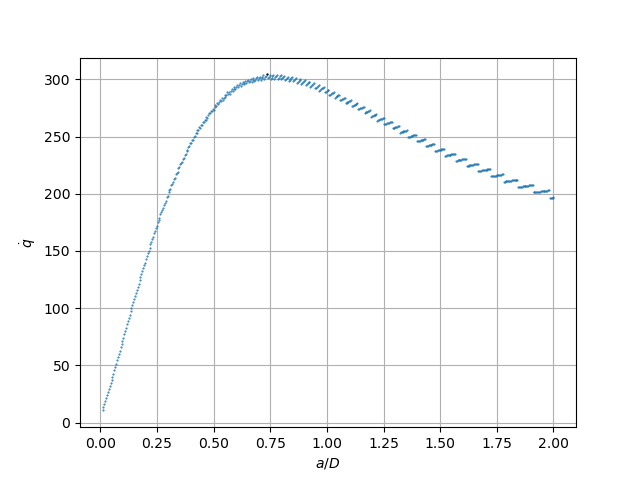

In [18]:
nmax = q.argmax()

fig,ax = plt.subplots()
ax.plot(a/D,q,'.',markersize=1)
ax.plot(a[nmax]/D,q[nmax],'k.',markersize=1)
ax.set_xlabel('$a/D$')
ax.set_ylabel('$\\dot q$')
ax.grid()

              

In [11]:


a_s = np.linspace(D*0.01,2*D,50)
D_s = np.linspace(D*0.1,D*6,50)
A, DS = np.meshgrid(a_s,D_s)
q = np.zeros_like(A)

for j,Di in enumerate(D_s):
    for i,ai in enumerate(a_s):
        L = 10*ai
        N = num_aletas(ai,W,Di)
        A_transversal,p = area_perimetro(ai,Di)
        Area_total = N*p*L
        Area_base = W**2-N*A_transversal
        betaL =  beta (ai,Di,k) *L
        eta_1 = eta(betaL)
        R_aletas = 1/(h(ai,Di)*Area_total*eta_1)
        R_base = 1/(h(ai,Di)*Area_base)
        R_paralelo = (1/R_aletas+1/R_base)**-1
    
        q[j,i] = (T_base-T_aire)/(R_paralelo)

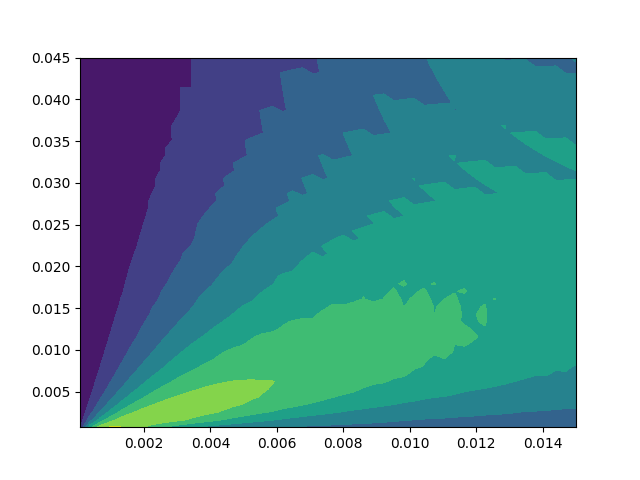

In [12]:
fig,ax = plt.subplots()
ax.contourf(A,DS,q)

In [13]:
j,i

(49, 49)